In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mrsa_2013 = pd.read_csv('mrsa data/mrsa-in-hospitals-2013.csv')
mrsa_2014 = pd.read_csv('mrsa data/mrsa-in-hospitals-2014.csv')
mrsa_2015 = pd.read_csv('mrsa data/mrsa-in-hospitals-2015.csv')

In [3]:
mrsa_2013.columns

Index(['Year ', 'State', 'HAI', 'Facility_Name1', 'Facility_Name2',
       'Facility_Name3', 'FACID1', 'FACID2', 'FACID3', 'County',
       'Infection_Count', 'Patient_Days', 'SIR ', 'SIR_95%_CI_Lower_Limit',
       'SIR_95%_CI_Upper_Limit', 'Comparison', 'Notes'],
      dtype='object')

/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([214.,  72.,  37.,  15.,   7.,   2.,   1.,   1.,   3.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

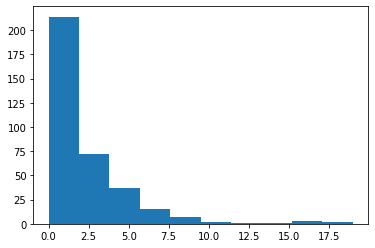

In [4]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

(array([297.,  41.,   8.,   6.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

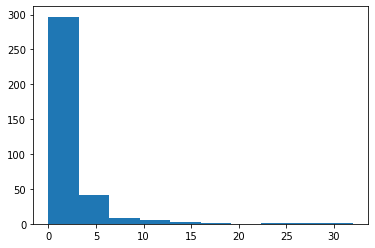

In [5]:
plt.hist(mrsa_2014['Cases'])

(array([258.,  52.,  34.,   6.,   5.,   0.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

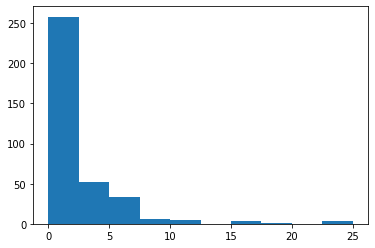

In [6]:
plt.hist(mrsa_2015['Hospital_Onset_Cases'])

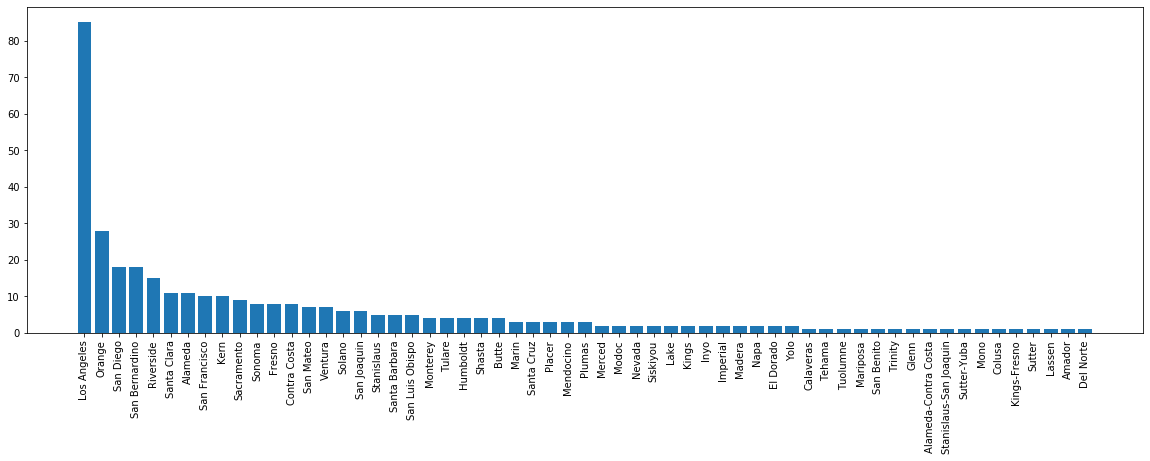

In [7]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

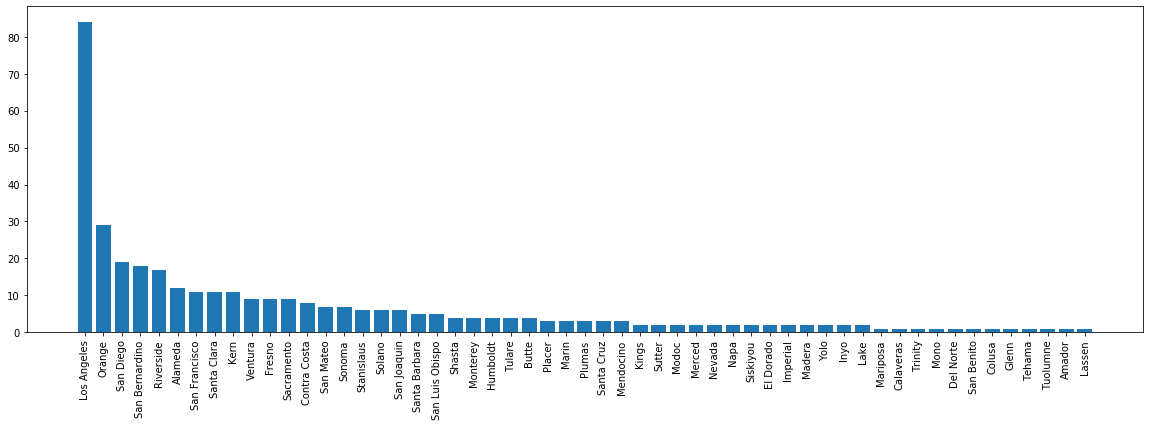

In [8]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

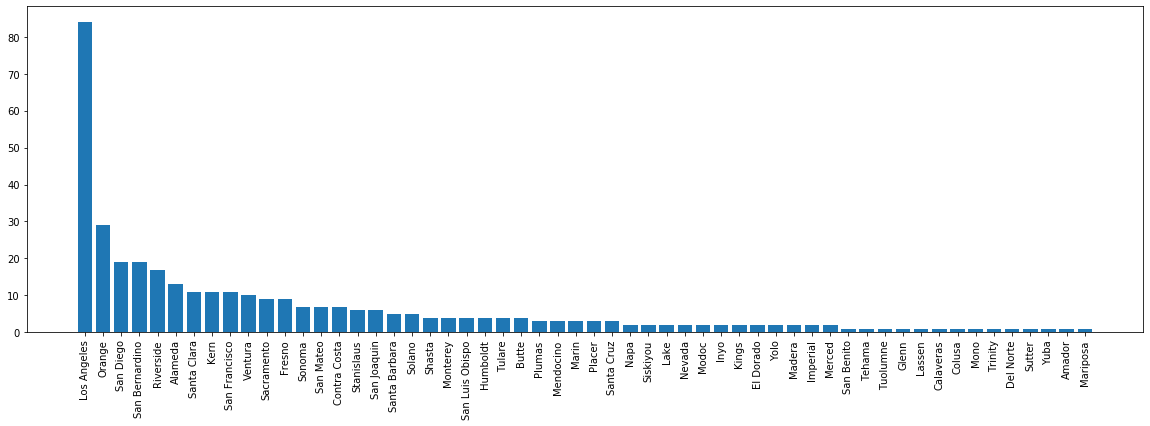

In [9]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [10]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

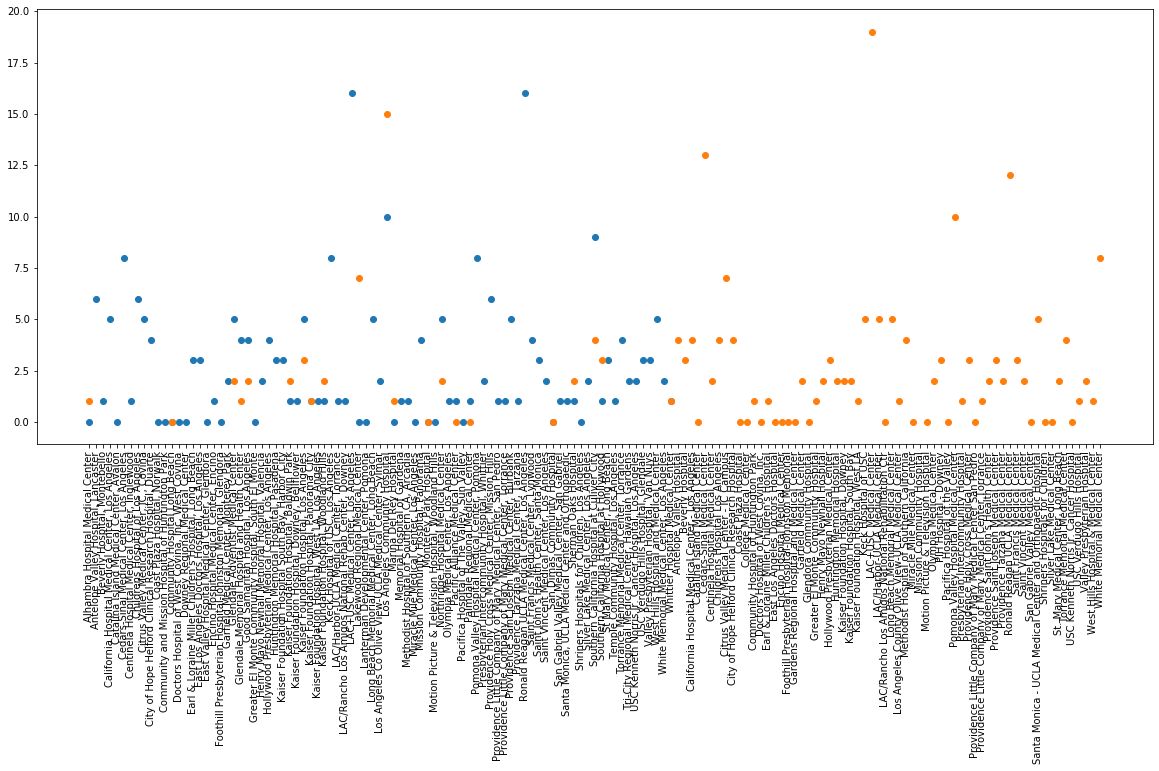

In [16]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

hospitals = la_2013['Facility_Name1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(la_2014['Facility_Name1'], la_2014['Cases'])

plt.xticks(rotation=90);

In [ ]:
la_2013.columns

In [ ]:
len(la_2014['Facility_Name1'].unique()) == len(la_2013['Facility_Name1'].unique())

In [17]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

[{'b', 'c'}]

In [18]:
len(la_2013['Facility_Name1']), len(la_2014['Facility_Name1']), len(la_2015['Facility_Name1']) # not the same hospitals

(85, 84, 84)

In [24]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

#[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

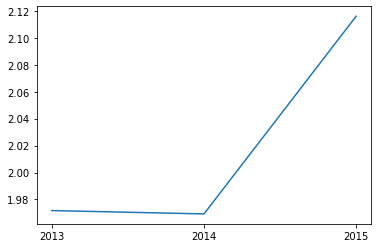

In [25]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Cases']),
                np.mean(mrsa_2015['Hospital_Onset_Cases'])]

plt.plot(['2013','2014','2015'],avg_inf_year) #one possible version of 5B 

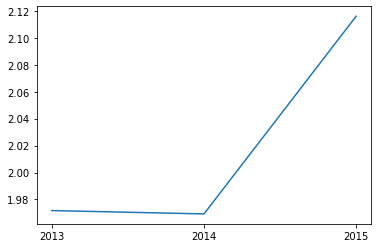

In [21]:
plt.plot(['2013','2014','2015'],avg_inf_year) #another version of 5B 

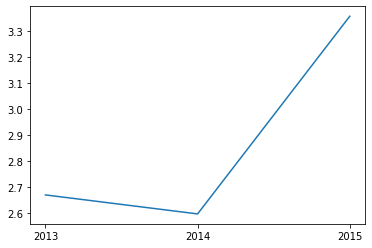

In [22]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']


avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                np.mean(la_2014['Cases']),
                np.mean(la_2015['Hospital_Onset_Cases'])]

plt.plot(['2013','2014','2015'],avg_inf_year_la)

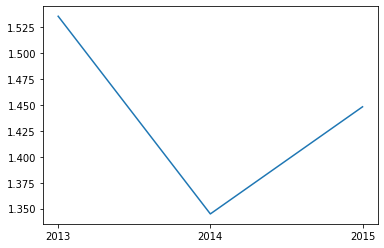

In [23]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']


avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                np.mean(orange_2014['Cases']),
                np.mean(orange_2015['Hospital_Onset_Cases'])]

plt.plot(['2013','2014','2015'],avg_inf_year_orange)

In [27]:
# population versus infection

## Note: tried to upload census data set to datahub, but it did not work...file too big??

census = pd.read_csv('cc-est2018-alldata-06.csv')

In [32]:
census.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,6,1,California,Alameda County,1,0,1510271,740573,769698,...,152378,145672,9669,10329,11266,10676,8261,8478,2160,2325
1,50,6,1,California,Alameda County,1,1,97652,50259,47393,...,14619,13768,1430,1348,1170,1008,1224,1245,317,313
2,50,6,1,California,Alameda County,1,2,94546,48145,46401,...,13336,13015,1124,1149,996,931,1049,952,242,249
3,50,6,1,California,Alameda County,1,3,91070,46403,44667,...,12590,12075,957,996,922,925,844,811,214,211
4,50,6,1,California,Alameda County,1,4,100394,51445,48949,...,12752,12317,951,916,945,952,800,766,218,229


In [33]:
census['YEAR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])